## Error Analysis

In [2]:
import pandas as pd
from sklearn.metrics import f1_score
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import datetime
from sklearn.preprocessing import MinMaxScaler
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_pickle("./compiled.pkl")
test_df = pd.read_pickle("./compiled_test.pkl")
test_df.columns
# train_df = train_df.loc[:,~train_df.columns.duplicated()].copy()
misclassified_df = pd.read_pickle('./compiled_test_with_predictions.pkl')

In [3]:
def get_feature_from_df(df, columns):   
    features = []
    for col in columns:
        features.append(list(df[col]))
        
    return features

all_columns = ['sentiment_compound_score',
       'number_of_words', 'number_of_characters', 'number_of_sentence',
        'DATE',
       'LANGUAGE', 'GPE', 'WORK_OF_ART', 'NORP', 'ORDINAL', 'LOC', 'CARDINAL',
       'FAC', 'PERCENT', 'LAW', 'QUANTITY', 'EVENT', 'PERSON', 'PRODUCT',
       'MONEY', 'ORG', 'TIME', 'total_entities', 'readability']

def train_and_test(df_train, df_test, feature_columns_interested, classes_interested, class_weights=None):
    df_train = df_train[train_df['Verdict'].isin(classes_interested)]
    df_test = df_test[test_df['Verdict'].isin(classes_interested)]

    features_train = get_feature_from_df(df_train, feature_columns_interested)
    features_train = list(map(list, zip(*features_train)))

    scaler = MinMaxScaler()
    features_train = scaler.fit_transform(features_train)

    X_train = features_train
    y_train = df_train['Verdict']

    if class_weights is not None:
        model = LogisticRegression(class_weight=class_weights)
    else:
        model = LogisticRegression()
        
    model.fit(X_train, y_train)

    # test out
    features_test = get_feature_from_df(df_test, feature_columns_interested)
    features_test = list(map(list, zip(*features_test)))

    features_test = scaler.transform(features_test)
    X_test = features_test

    y_test = df_test['Verdict']
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

## Base model from Tai

/Users/justinhoe/Desktop/Y4S2/4248/LUN/proj/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           1       0.83      0.72      0.77       750
           2       0.74      0.70      0.72       750
           3       0.75      0.83      0.79       750
           4       0.83      0.89      0.86       750

    accuracy                           0.79      3000
   macro avg       0.79      0.79      0.78      3000
weighted avg       0.79      0.79      0.78      3000

0.7843630006585706


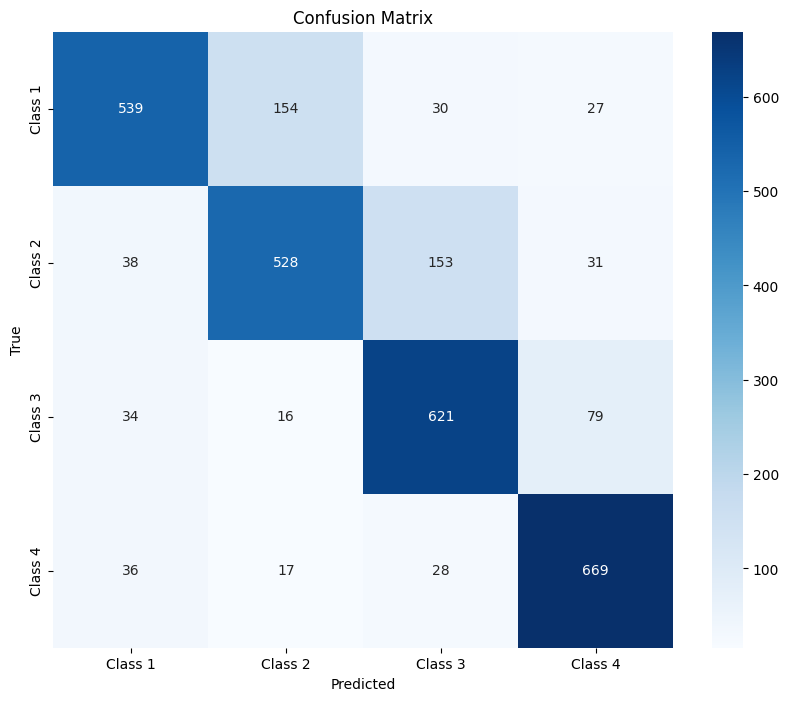

,Verdict,Text,sentiment,sentiment_compound_score,number_of_words,number_of_characters,number_of_sentence,ORDINAL,DATE,GPE,...,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,predicted
0,1,When so many actors seem content to churn out ...,"{'neg': 0.076, 'neu': 0.851, 'pos': 0.073, 'co...",-0.4526,251,1356,14,0,2,1,...,0,0,0,0,0,0,0,0,0,1
1,1,In what football insiders are calling an unex...,"{'neg': 0.159, 'neu': 0.777, 'pos': 0.064, 'co...",-0.9601,202,1173,15,0,2,2,...,21,11,47,14,63,59,16,7,58,1
2,1,In a freak accident following Game 3 of the N....,"{'neg': 0.085, 'neu': 0.805, 'pos': 0.11, 'com...",0.6644,167,979,9,0,2,1,...,13,14,15,5,29,16,11,7,6,1
3,1,North Koreas official news agency announced to...,"{'neg': 0.1, 'neu': 0.789, 'pos': 0.111, 'comp...",0.1280,134,814,6,0,2,1,...,3,0,3,3,2,4,3,4,2,4
4,1,The former Alaska Governor Sarah Palin would b...,"{'neg': 0.052, 'neu': 0.897, 'pos': 0.051, 'co...",-0.3079,177,1120,14,0,1,2,...,8,2,5,4,15,18,3,3,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,4,The Air Force mistakenly gave rival companies ...,"{'neg': 0.042, 'neu': 0.896, 'pos': 0.062, 'co...",0.9306,581,3669,37,1,10,2,...,0,0,0,1,1,9,0,1,5,4
2996,4,The United Nations climate chief on Friday cha...,"{'neg': 0.02, 'neu': 0.932, 'pos': 0.049, 'com...",0.8820,348,2114,20,0,2,0,...,1,0,3,1,4,6,1,1,10,4
2997,4,River Plate midfielder Diego Buonanotte has un...,"{'neg': 0.141, 'neu': 0.812, 'pos': 0.047, 'co...",-0.8750,96,572,7,0,4,0,...,1,2,6,0,8,1,3,0,1,4
2998,4,Lawmakers were on the brink Tuesday of exempti...,"{'neg': 0.06, 'neu': 0.843, 'pos': 0.097, 'com...",0.9638,611,4022,30,0,8,2,...,3,0,3,2,4,7,1,0,6,4


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df_train = pd.read_pickle("./compiled.pkl") # train df
df_test = pd.read_pickle("./compiled_test_with_predictions.pkl") # test df

def tai_model(df_train, df_test):
  def get_feature_from_df(df):
      columns = ['sentiment_compound_score',
        'number_of_words', 'number_of_characters', 'number_of_sentence',
          'DATE', 
        'LANGUAGE', 'GPE', 'WORK_OF_ART', 'NORP', 'ORDINAL', 'LOC', 'CARDINAL',
        'FAC', 'PERCENT', 'LAW', 'QUANTITY', 'EVENT', 'PERSON', 'PRODUCT',
        'MONEY', 'ORG', 'TIME', 'total_entities', 'readability']

      features = []
      for col in columns:
          features.append(list(df[col]))
      # features.append(list(number_of_capitalized))
      return features

  df_train = df_train.loc[:,~df_train.columns.duplicated()].copy()
  features_train = get_feature_from_df(df_train)

  # we need to reshape it to become (n_samples, n_features)
  features_train = list(map(list, zip(*features_train)))
  scaler = MinMaxScaler()
  features_train = scaler.fit_transform(features_train)

  # Step 1: Convert texts to TF-IDF features
  vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
  tfidf_train = vectorizer.fit_transform(df_train["Text"])

  # Combine the text features with the extracted features
  from scipy.sparse import hstack
  X = hstack([tfidf_train, features_train])

  # print("features_train start from " + str(tfidf_train.shape[1]) + " to " + str(X.shape[1]))

  # Step 2: Apply Chi-squared test
  chi2score = chi2(X, df_train['Verdict'])

  # Step 3: Select the top 60k features
  chi2_selector = SelectKBest(chi2, k=60000)
  X_kbest_features = chi2_selector.fit_transform(X, df_train['Verdict'])

  # get the selected feature names
  feature_names = chi2_selector.get_feature_names_out()

  feature_cols = ['sentiment_compound_score',
        'number_of_words', 'number_of_characters', 'number_of_sentence',
          'DATE', 
        'LANGUAGE', 'GPE', 'WORK_OF_ART', 'NORP', 'ORDINAL', 'LOC', 'CARDINAL',
        'FAC', 'PERCENT', 'LAW', 'QUANTITY', 'EVENT', 'PERSON', 'PRODUCT',
        'MONEY', 'ORG', 'TIME', 'total_entities', 'readability']
  # see the selected features
  for i in range(len(feature_names)):
      name = feature_names[i]
      number = name.split('x')[1]
      if int(number) in range(tfidf_train.shape[1], X.shape[1]):
          # print("tfidf: " + str(feature_names[i]))

          index = int(str(feature_names[i]).split('x')[1]) - tfidf_train.shape[1]
          # print(feature_cols[index])
  class_weights = {1: 2,  # Class 0
                  2: 4,  # Class 1
                  3: 2, # Class 2 (Assuming this is the underrepresented class)
                  4: 2}  # Class 3
  model = LogisticRegression(class_weight=class_weights)
  model.fit(X_kbest_features, df_train['Verdict'])
  # Step 1: Convert texts to TF-IDF featu res
  # df_test["Text"] = df_test["Text"].apply(preprocessing)
  X_test = vectorizer.transform(df_test["Text"])
  features_test = get_feature_from_df(df_test)

  # we need to reshape it to become (n_samples, n_features)
  features_test = list(map(list, zip(*features_test)))
  features_test = scaler.transform(features_test)

  X_test = hstack([X_test, features_test])

  # Get the top 1000 features as above
  X_test_kbest_features = chi2_selector.transform(X_test)
  # X_test_kbest_features = X_test

  # Step 4: Predict the class of the new texts
  predicted_classes = model.predict(X_test_kbest_features)
  df_test['predicted'] = predicted_classes

  # Assuming df_test["Class"] contains the true class of the new texts
  print(classification_report(df_test["Verdict"], predicted_classes))
  print(f1_score(df_test["Verdict"], predicted_classes, average='macro'))
  
  conf_matrix = confusion_matrix(df_test['Verdict'], predicted_classes)
  class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4']
  plt.figure(figsize=(10, 8))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()
  return df_test

tai_model(train_df, test_df)


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

index = {1: "Satire", 2: "Hoax", 3: "Propaganda", 4:"Reliable News"}
def investigate_box_plot(a, misclased_b, features):
  """Numerical features of class a misclassified as class b will be plotted. If misclassified 
    boxplot matches class b potentially a feature that is causing misclassification"""
  satire_misclassified_as_hoax_df = df_test[(df_test["Verdict"] == a) & (df_test["predicted"] == misclased_b)]
  hoax_correct_df = df_test[(df_test["Verdict"] == misclased_b) & (df_test["predicted"] == misclased_b)]
  satire_correct_df = df_test[(df_test["Verdict"] == a) & (df_test["predicted"] == a)]
  # Prepare the data for box plots
  a_key = f'{index[a]}'  
  mb_key = f'{index[misclased_b]}'
  amb_key = f'{index[a]} misclassified to {index[misclased_b]}'
  data = {
      a_key : satire_correct_df[features],
      mb_key : hoax_correct_df[features],
      amb_key : satire_misclassified_as_hoax_df[features]
  }
  # Create box plots
  fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(10, 100))
  for i, l in enumerate(features):
      axes[i].boxplot([data[a_key][l], data[mb_key][l], data[amb_key][l]])
      axes[i].set_title('Box Plot for ' + l)
      axes[i].set_xticklabels([a_key, mb_key, amb_key])
      axes[i].set_ylabel('Values')

  # Adjust layout
  plt.tight_layout()

  # Show the plot
  plt.show()

numerical_features = ['number_of_words', 'number_of_characters', 'number_of_sentence', 'sentiment_compound_score',
        'DATE', 'LANGUAGE', 'GPE', 'WORK_OF_ART', 'NORP', 'ORDINAL', 'LOC', 'CARDINAL',
       'FAC', 'PERCENT', 'LAW', 'QUANTITY', 'EVENT', 'PERSON', 'PRODUCT',
       'MONEY', 'ORG', 'TIME', 'total_entities', 'readability']

## Class 1 (Satire) misclassified as 2 (Hoax)

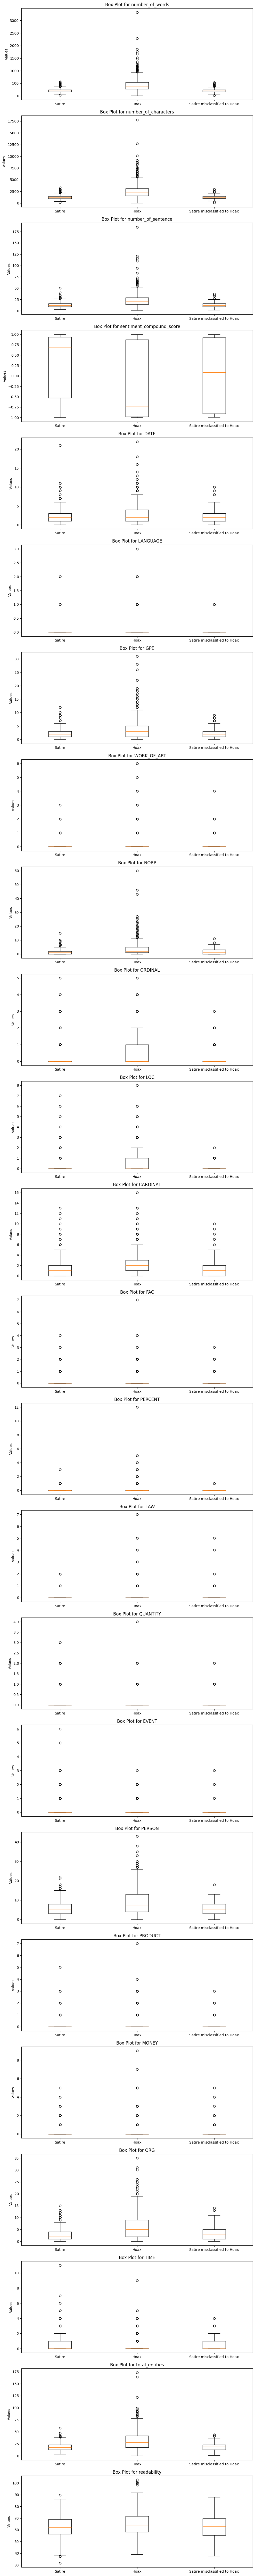

In [113]:
investigate_box_plot(1,2, numerical_features)

Only possible feature causing class 1 to be misclassified to class 2 is sentiment compound score

/Users/justinhoe/Desktop/Y4S2/4248/LUN/proj/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/z3/k29jsmxx1ds3zc21hy27hhk40000gn/T/ipykernel_87119/1472079089.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted'] = predicted_classes


              precision    recall  f1-score   support

           1       0.82      0.73      0.77       681
           2       0.76      0.70      0.73       750
           3       0.75      0.83      0.79       750
           4       0.83      0.89      0.86       750

    accuracy                           0.79      2931
   macro avg       0.79      0.79      0.79      2931
weighted avg       0.79      0.79      0.79      2931

0.7884289849281244


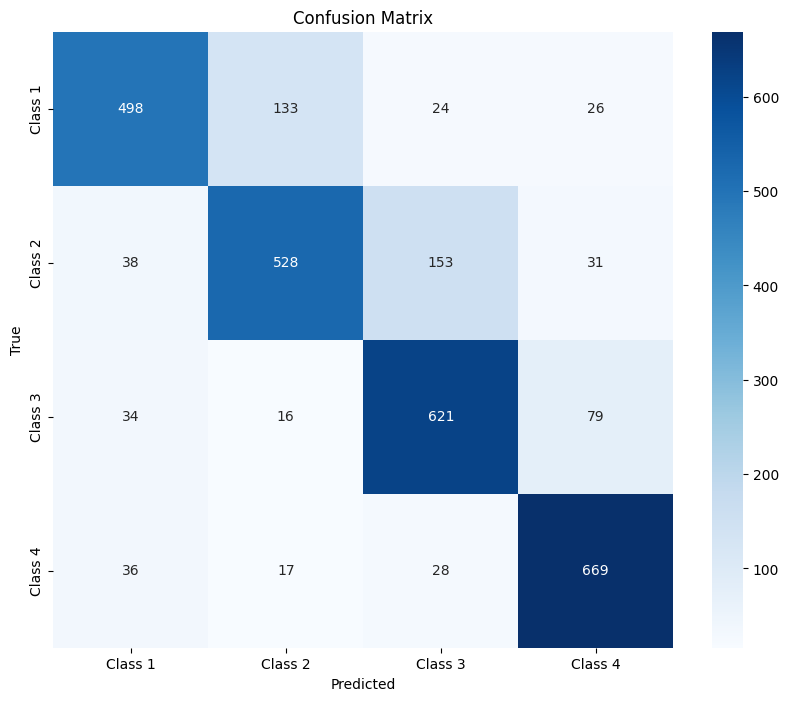

In [6]:
# clean satire scores with low sentiment compound score
# Only take high scoring sentiment compound score in test
satire_cleaned = df_test[((df_test["Verdict"] == 1) & (df_test["sentiment_compound_score"] > -0.95)) | (df_test["Verdict"] != 1)]
pred_df = tai_model(df_train, satire_cleaned)


We can see that sentiment compound score < -0.75 mostly misclassified to hoax, and filtering those out gives better f1 score. Now let's try changing the train_df to bump down the sentiment scores used in training. Doesn't give better data.

(539-474)/539 = 0.12 (Correctly predicted thats filtered)
(154-114)/154 = 0.26 (Wrongly predicted that is filtered)

On to micro analysis

In [25]:
# Only take lower scoring sentiment compound score for testing for satire
# train_cleaned = train_df[((train_df["Verdict"] == 1) & (train_df["sentiment_compound_score"] < 0.9)) | (train_df["Verdict"] != 1)]
# tai_model(train_cleaned, test_df)
mis_predicted_satire_w_low_sentiment = test_df[(test_df['Verdict'] == 1) & (test_df['predicted'] == 2) & (test_df['sentiment_compound_score'] < -0.9)]
for t in (mis_predicted_satire_w_low_sentiment['Text'][:5]):
  print(t)
  print(" ")
hoax_w_low_sentiment = test_df[(test_df['Verdict'] == 2) & (test_df['predicted'] == 2) & (test_df['sentiment_compound_score'] < -0.9)]
for t in (hoax_w_low_sentiment['Text'][:5]):
  print(t)
  print(" ")

In what may be the most serious allegation ever made against the former Secretary of State, Fox News Channel reported today that Hillary Clinton was involved in the conspiracy to murder President Abraham Lincoln. The latest charge against Mrs. Clinton was reported by Fox host Sean Hannity, who said that the evidence of her role in the Lincoln assassination came mainly in the form of e-mails. According to Mr. Hannity, If its true that Hillary Clinton killed Lincoln, this could have a major impact on her chances in 2016. The accusation against Mrs. Clinton drew a strong response from Sen. Lindsey Graham (R.S. Carolina): Theres been a concerted effort by Hillary Clinton to cover up her role in President Lincolns murder. She has said nothing about it. This is bigger than Watergate, the Cuban missile crisis, and the Second World War put together. Responding to the allegation, Mrs. Clinton issued a terse statement indicating that she could not have participated in Lincolns assassination beca

Satire (low sentiment):
In what historians are calling an unprecedented development in American politics, both major parties decided today to cancel the 2012 election. The decision to scrap the 2012 contest came on the heels of a new poll showing President Barack Obama with an approval rating of a hundred per cent, believed to be a record high for an American President. Mr. Obama even polled well among Republicans, with a majority of G.O.P. voters agreeing with the statement, I no longer care that he wasnt born here. The new bipartisan spirit sweeping the nation was captured well by House Speaker John Boehner (R., Ohio), who tearfully told reporters, This is a great day for America oh, leave me alone, goddamn it. Republican Presidential hopeful Donald Trump made no official announcement, but sources said he was considering running for Prime Minister of Canada. The cancellation of the election comes in the aftermath of the death of Osama bin Laden, whose last words reportedly were, I knew I shouldnt have signed up for Foursquare. Of all the major news networks, Fox News did not report news of bin Ladens death, saying that it would air cartoons until further notice. In Libya, Colonel Muammar Qaddafi issued the following official statement: Uh-oh. In North Korea, President Kim Jong-il said this: I have lost my last friend on Facebook. And in Wasilla, former Alaska Governor Sarah Palin said this: We must find and kill Osama bin Laden. 

Hoax (low sentiment):
Ted Nugent Just Pissed off Every Islamic Terrorist in the World by Pointing Out One HUGE Fact... Ted Nugent just brought to light one important detail that I guarantee none of these Islamic terrorists have even considered. In the Islamic religion, pork and pork products are forbidden because the pig is considered an impure animal. In a Facebook post Ted writes Looks like these Muslim terrorists are in for a rude awakening when they reach the afterlife! Thanks for the good news Ted!! 


Hard to differentiate satire and hoax, both have strong use of sacarstic language

## Class 2 (Hoax) misclassified as 3 (Propaganda)

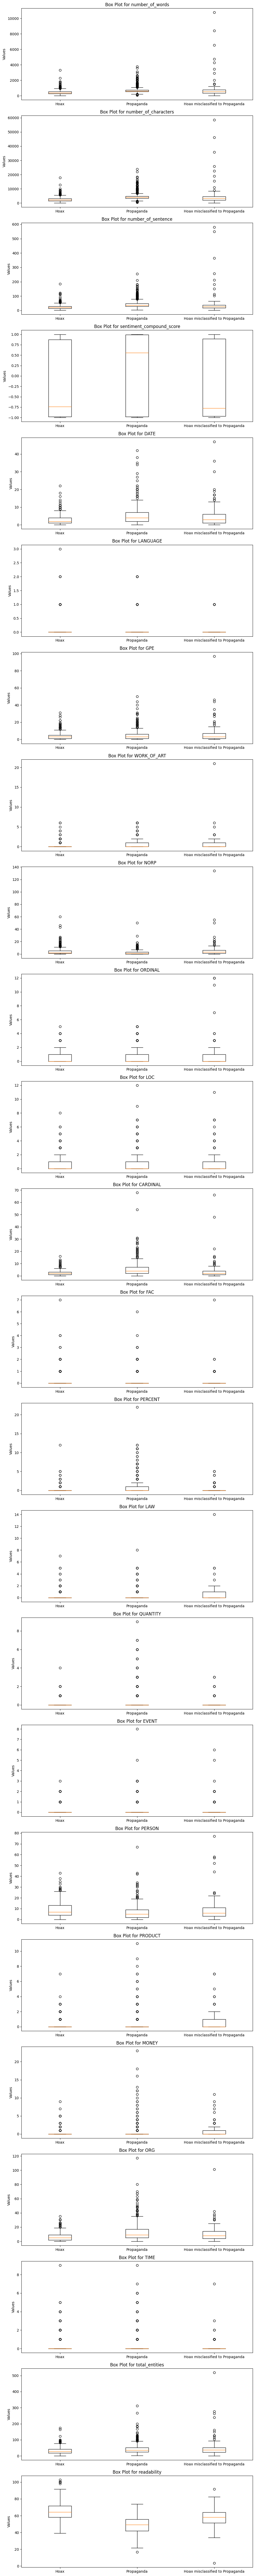

In [51]:
investigate_box_plot(2,3, numerical_features)

Hoax misclassified as proaganda likely due to text lengths, Workofart, product, law, money, readability

Sentences greater 300 mis classified as propaganda

### Less than 200 sentences less than 5000 characters

/Users/justinhoe/Desktop/Y4S2/4248/LUN/proj/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/z3/k29jsmxx1ds3zc21hy27hhk40000gn/T/ipykernel_11091/745710103.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted'] = predicted_classes


              precision    recall  f1-score   support

           1       0.86      0.72      0.78       750
           2       0.55      0.75      0.63       304
           3       0.86      0.83      0.84       750
           4       0.85      0.89      0.87       750

    accuracy                           0.81      2554
   macro avg       0.78      0.80      0.78      2554
weighted avg       0.82      0.81      0.81      2554

0.7817938970164298


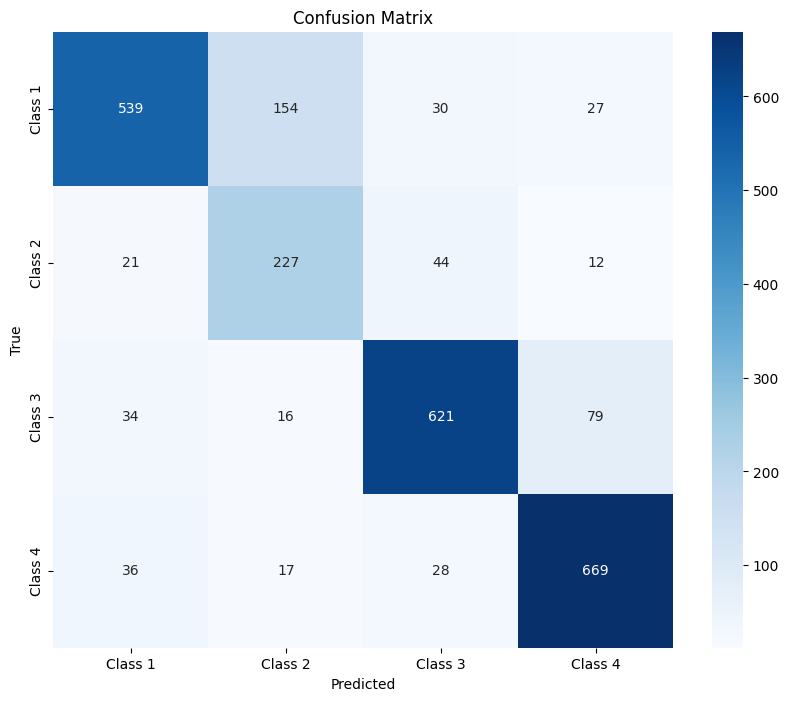

In [47]:
# clean hoax with many sentences
# Only take few sentences in test
satire_cleaned = df_test[((df_test["Verdict"] == 2) 
                          & (df_test['number_of_sentence'] < 100) 
                          & df_test['number_of_characters'] < 5000) | (df_test["Verdict"] != 2)]
pred_df = tai_model(df_train, satire_cleaned)
# Small changes


/Users/justinhoe/Desktop/Y4S2/4248/LUN/proj/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/z3/k29jsmxx1ds3zc21hy27hhk40000gn/T/ipykernel_11091/745710103.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted'] = predicted_classes


              precision    recall  f1-score   support

           1       0.84      0.72      0.77       750
           2       0.73      0.73      0.73       695
           3       0.77      0.83      0.80       750
           4       0.84      0.89      0.86       750

    accuracy                           0.79      2945
   macro avg       0.79      0.79      0.79      2945
weighted avg       0.79      0.79      0.79      2945

0.7910731544882317


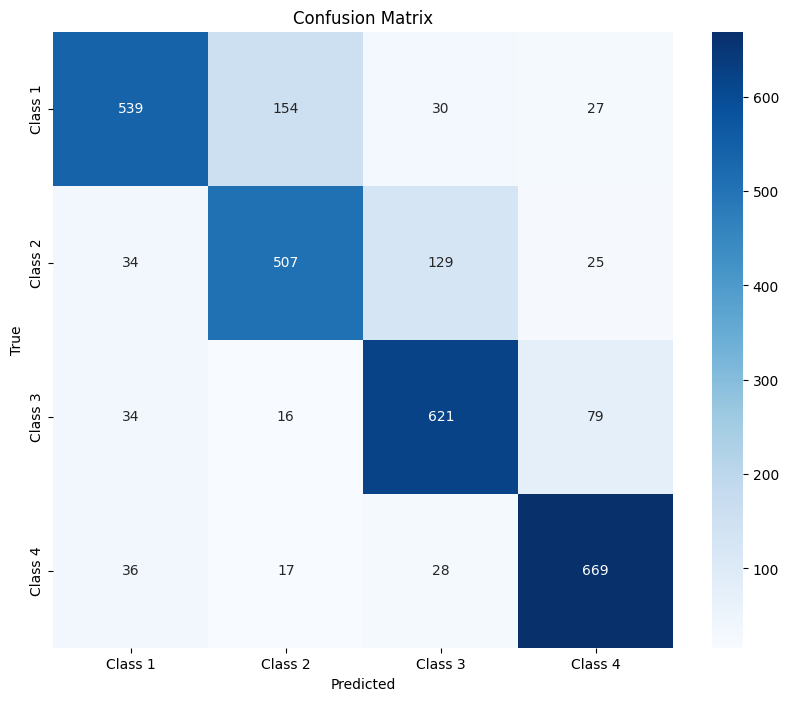

Freed Slaves In Washington? Dont Blame Us We Werent Born Yet! April of 2015 was the 150th anniversary marking the conclusion of the civil war. We have a few in Washington who want you to think they are that old. They want to punish white people for something that took place 150 years ago. Sheila Jackson said she is a freed slave. The only chain she has ever known is the gold wrapped around her neck paid for by the American taxpayer. She hasnt missed a meal in over forty years and eats well in first class. For her to say she is a freed slave is equally ignorant as the men who once owned slaves. There isnt anyone that holds a right to punish for what happened 150 years ago. They too have no right to take credit for what Dr. King did fifty years ago. Some of our leaders are turning the Kings dream into a nightmare. Dr. King stood for civil rights while attempting to unite Americans. People like Al Sharpton do nothing to better the lives of anyone while driving a wedge between black and wh

In [70]:
# Workofart, product, law, money, readability

hoax_cleaned = df_test[((df_test["Verdict"] == 2) 
                          & (df_test['MONEY'] < 2))
                          | (df_test["Verdict"] != 2)]
pred_df = tai_model(df_train, hoax_cleaned)

mis_predicted_hoax_low_money = df_test[((df_test["Verdict"] == 2) & (df_test['MONEY'] > 2) & (df_test['predicted'] == 3))]
propaganda_w_low_money = df_test[((df_test["Verdict"] == 3) & (df_test['MONEY'] > 2) & (df_test['predicted'] == 3))]
# Small changes
for t in (mis_predicted_hoax_low_money['Text'][:5]):
  print(t)
  print(" ")

for t in (propaganda_w_low_money['Text'][:5]):
  print(t)
  print(" ")

Micro analysis:
(528 - 507)/528 = 0.03 of true positives removed
(153 - 129)/153 = 0.15 of misclassification due to money

/Users/justinhoe/Desktop/Y4S2/4248/LUN/proj/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/z3/k29jsmxx1ds3zc21hy27hhk40000gn/T/ipykernel_11091/745710103.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted'] = predicted_classes


              precision    recall  f1-score   support

           1       0.84      0.72      0.77       750
           2       0.73      0.74      0.73       674
           3       0.78      0.83      0.80       750
           4       0.84      0.89      0.86       750

    accuracy                           0.80      2924
   macro avg       0.79      0.79      0.79      2924
weighted avg       0.80      0.80      0.79      2924

0.7925933750474556


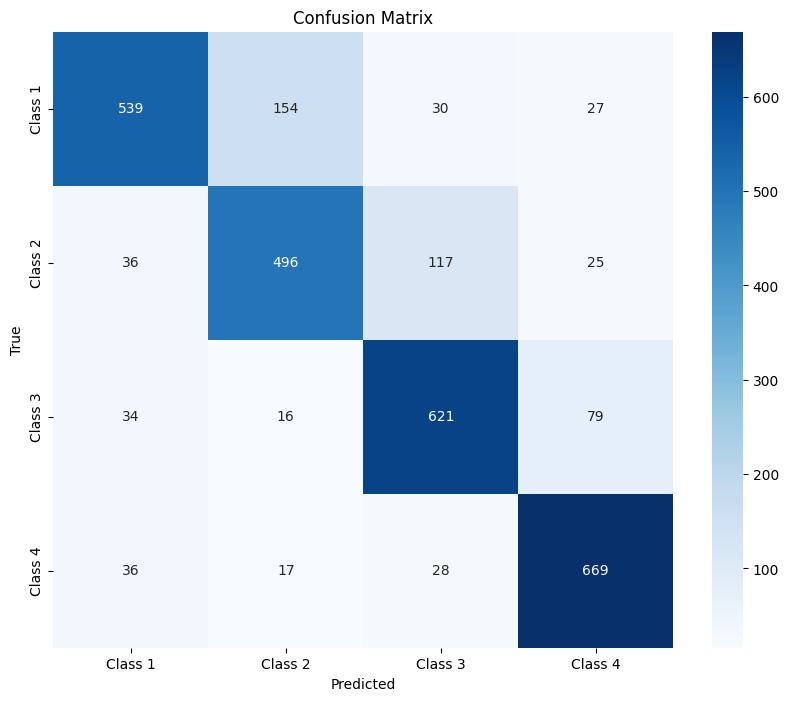

Freed Slaves In Washington? Dont Blame Us We Werent Born Yet! April of 2015 was the 150th anniversary marking the conclusion of the civil war. We have a few in Washington who want you to think they are that old. They want to punish white people for something that took place 150 years ago. Sheila Jackson said she is a freed slave. The only chain she has ever known is the gold wrapped around her neck paid for by the American taxpayer. She hasnt missed a meal in over forty years and eats well in first class. For her to say she is a freed slave is equally ignorant as the men who once owned slaves. There isnt anyone that holds a right to punish for what happened 150 years ago. They too have no right to take credit for what Dr. King did fifty years ago. Some of our leaders are turning the Kings dream into a nightmare. Dr. King stood for civil rights while attempting to unite Americans. People like Al Sharpton do nothing to better the lives of anyone while driving a wedge between black and wh

In [79]:
# Analysis on readability
hoax_cleaned = df_test[((df_test["Verdict"] == 2) 
                          & (df_test['readability'] > 50))
                          | (df_test["Verdict"] != 2)]
pred_df = tai_model(df_train, hoax_cleaned)

mis_predicted_hoax_low_money = df_test[((df_test["Verdict"] == 2) & (df_test['readability'] > 50) & (df_test['predicted'] == 3))]
propaganda_w_low_money = df_test[((df_test["Verdict"] == 3) & (df_test['readability'] > 50) & (df_test['predicted'] == 3))]
# Small changes
for t in (mis_predicted_hoax_low_money['Text'][:5]):
  print(t)
  print(" ")

for t in (propaganda_w_low_money['Text'][:5]):
  print(t)
  print(" ")

(528 - 496)/528 = 0.06 True predicted removed
(153 - 117)/153 = 0.23 Hoax misclassified

Democrat Slavery - Black Americans Deceived, Manipulated The orchestratedpolitical insurgency is shifting into high gear, with plans for a Democracy Spring financed by billionaire anti-American puppet master George Soros next month and his continued violent disruption of the political process. Racist hate will surely play a prominent role in the Democrat plans as they have in the past, through the manipulation of black people and others under the Black Lives Matter organization, Moveon.org and others. There are some black Americans who understandthat the Democrat Party and the communists that permeate it are the problem. They recognize that slavery is still alive in America and that the slave masters are not generally the Republicans but their Democrat wolves in sheep clothing. Alfonzo Rachel speaks to the issue of the Democrat institutionalized slaveryand how they have convinced many black Americans that they are representing and fighting for them when in actuality the opposite is true. They are still operating the plantation and it is through short-term support at a slave level, made possible by the confiscation of the assets of others and its subsequent redistribution, that it is made possible. That is both socialism or the early stages of communism and slavery. They only get to keep the free rewards of slavery so long as they keep voting in their masters into the big house. If they lose power, the free ride is over, a ride to economic and social destruction. The video, from last September, is even more timely and relevant today than it was when it was first relased. Things have gotten decidedly worse, by design of the Obama regime other interests, including Soros. His message and warning to his fellow black Americans is that they are being herded and manipulated and the Democrats have them under their control. There is a lot here that much of black America would find useful if theyre willing to listen. Im Rick Wells a constitutional conservative writer who recognizes that our nation, our Constitution and our traditions are under a full scale assault from multiple threats. Im not PC; I call it like I see it. Please SUBSCRIBE in the right sidebar athttp://RickWells.usorhttp://constitutionrising.comto receive our posts directly. Thank You Rick Wells. 

 Tweet Eli Lilly treated the American public 'like guinea pigs' says Harvard psychiatrist Martin Teicher. He goes on to explain how Eli Lilly was engaged in widespread scientific fraud in the cherry picking of individuals for drug trial results. Basically, if anyone in the drug trial began to show suicidal behavior, they were 'excused' from the trial and removed from the outcome data. None of this is any surprise to readers of this website, of course. I went public with accusations about the suicide risk of of antidepressant drugs in 1999. At that time it was widely ridiculed and called a 'conspiracy theory.' Now, once again, it is emerging as scientific fact. There are so many murder/suicides linked to Prozac and other SSRI drugs that the public would be absolutely shocked to learn the true details of how many people have been killed by these drugs. Remember Phil Hartman, the comedian? He was killed by his wife who was also on these drugs. And let's not forget the Colombine massacre, in which both teenage boys who blew away their classmates were on antidepressants. What amazes me the most about all this is how drug companies manage to cover up these facts and suppress negative evidence for so long. After all, these missing Prozac documents are from a trial in 1994! That's a good ten years of suppression during which billions of dollars worth of these drugs have been peddled to patients by drug-pushing doctors. Of course, Eli Lilly denies everything. All their drugs are perfectly safe, they have nothing to hide, and their only mission is to serve the good of mankind... to hear it from them, anyway. I wonder how the parents of the Colombine children feel about all this? 


## Class 3 (Propaganda) misclassified as 4 (Reliable news)

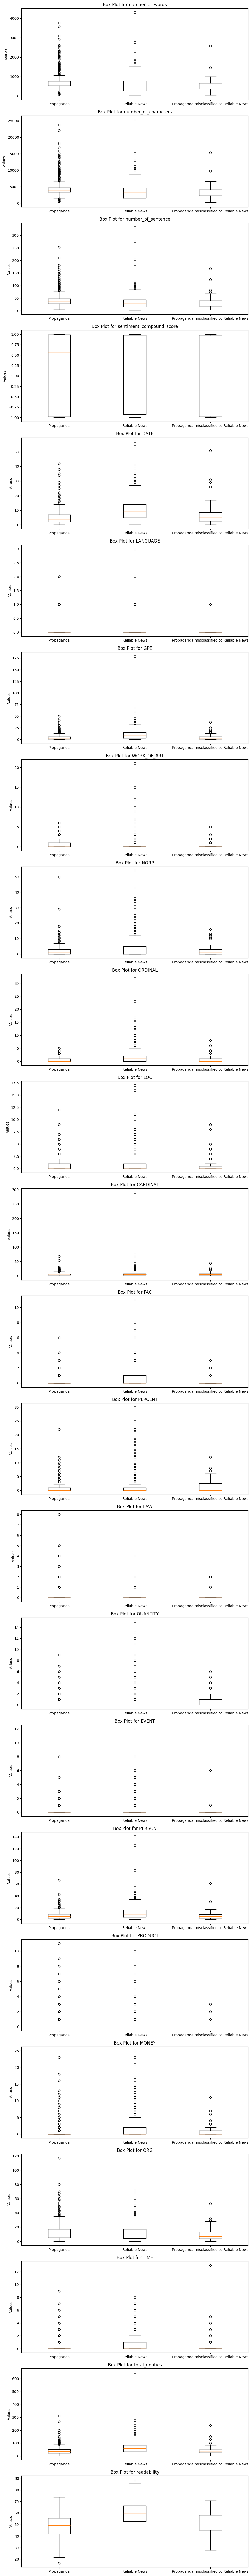

In [116]:
investigate_box_plot(3,4, numerical_features)